difference after 40 minutes: 29.224179399141633
difference after 30 minutes: 23.98472792452833
Total avrg difference is: 24.906208312757204


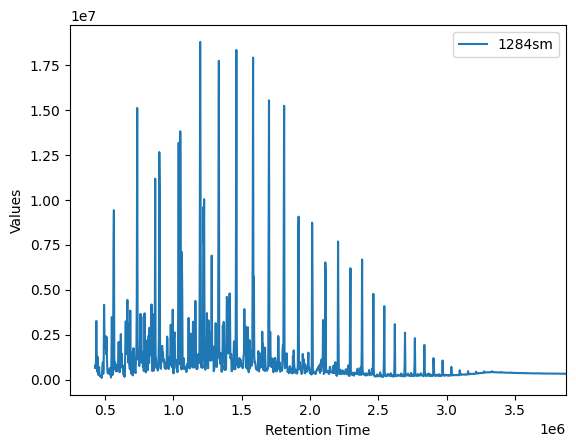

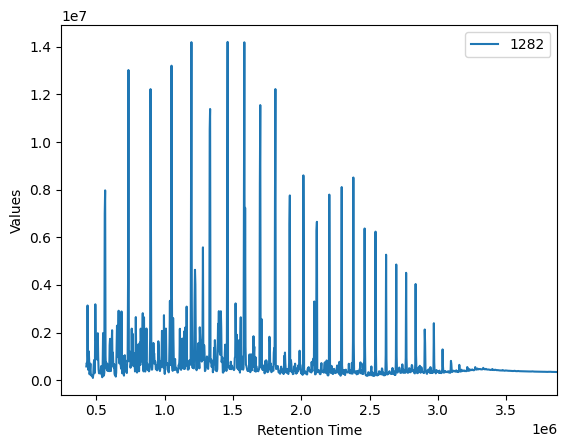

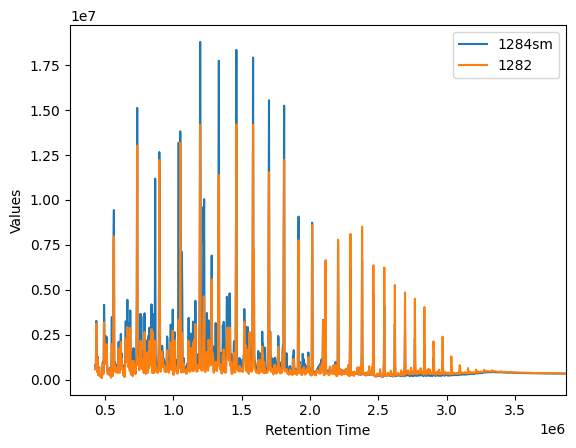

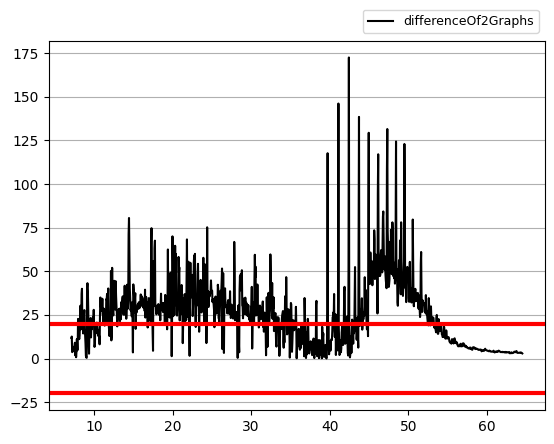

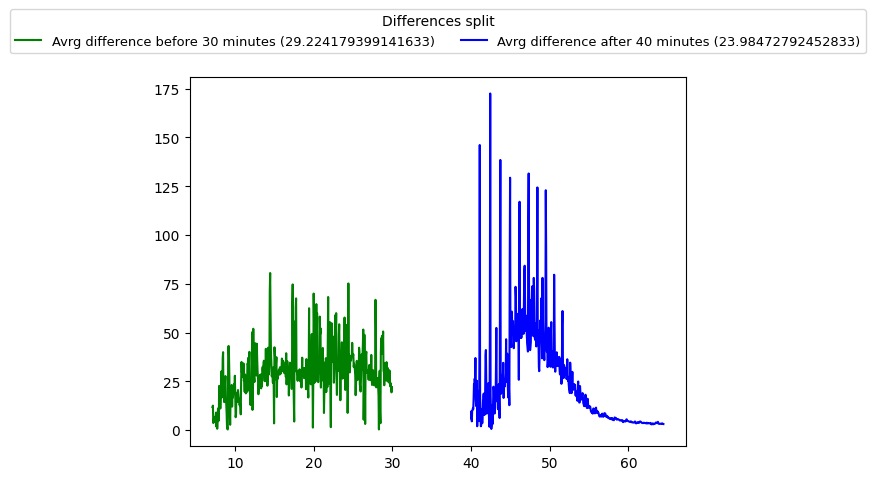

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
#function to get the closest matching number from a list K = number to find lst = list to search
def closest(lst, K):
    return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))]

#function to draw graph
def getNCalcGraph(fileName=[r"C:\Users\zanyi\OneDrive\Git hub\Python\1284sm.csv",r"C:\Users\zanyi\OneDrive\Git hub\Python\1282.csv"],  #Can add extra files XD
                  savePosition=r"C:\Users\zanyi\OneDrive\Git hub\Python", saveas="testing.png", RoundDigit = 3,IntensityColumn=1, retentionTimeColumn=0):
    fig, ax = plt.subplots()
    saves = []
    #repeat this loop until all file(name/directory up here^^^) is completed
    for names in fileName:
        df = pd.read_csv(names)
        retentionTime = df.iloc[:,retentionTimeColumn].to_list() #get retention time of dataset
        temp = retentionTime[retentionTimeColumn] #should not be important
        rn  = 0  #should not be important
        summsIndex=[] #
        Rtime=[] #
        last=0 #
        # get values in periods of 3000 ms
        for i in range(len(retentionTime)):
            rn = retentionTime[i]
            if rn-temp > 3000:
                temp = retentionTime[i-1]
                Rtime.append(temp)
                summsIndex.append([last,i]) #the indexes of the segments of value (3000ms each rn)
                last = i
        Data = df.iloc[:,IntensityColumn].to_list() #get intensity data from csv
        rsum=[] #sum of each 3000ms segment
        for segment in summsIndex:
            fsum=0
            pts=Data[segment[0]:segment[1]]
            for items in pts:
                fsum+=items
            rsum.append(round(fsum,RoundDigit))

        #cut down the list until 245000 ms later
        cutIndex = Rtime.index(closest(Rtime, 230000))
        cutx = list(Rtime[cutIndex :len(Rtime)-1])
        cuty = list(rsum[cutIndex:len(rsum)-1])
        ax.plot(cutx,cuty, label=f"{Path(names).stem}")
        saves.append(cuty) #save down the cut intensity value

    # ax.set_title('Example plot') #title
    ax.set_xlabel('Retention Time') #x label
    ax.set_ylabel('Values') #y label
    plt.xlim([245000, max(Rtime)]) #set x line
    ax.legend() #show legend
    plt.savefig(savePosition + "/" + saveas) #save graph
    return [saves, cutx] #return intensity value & the retention time value





#get percentage difference from 2 graph & plot them
def getDifference(saves,cutx): 
    log = [] #variable to take down percentage difference
    for ind in range(len(cutx)): #go through all values after 245000ms & calculate difference
        log.append(round((
            abs(saves[1][ind]-saves[0][ind])/abs(saves[0][ind])
            )*100,4))
    fig, ax2 = plt.subplots() #start plotting the difference
    fig, ax3 = plt.subplots()
    for ind,i in enumerate(cutx): #convert milisecond to minutes
        cutx[ind] = i/60000


    #calculating avrg part
    Index30Min = cutx.index(closest(cutx,30)) #Get graph difference before 30 minute (index)
    Index40Min = cutx.index(closest(cutx,40)) #get graph difference after 40 minute (index)
    diffBefore30Min = log[0:Index30Min] #get list values of difference
    diffAfter40Min = log[Index40Min:-1] #get list values of difference
    d30a = sum(diffBefore30Min)/len(diffBefore30Min)
    d40a = sum(diffAfter40Min)/len(diffAfter40Min)
    ax3.plot(cutx[0:Index30Min], diffBefore30Min,color="Green", label = f"Avrg difference before 30 minutes ({d30a})") #plotting
    ax3.plot(cutx[Index40Min:-1], diffAfter40Min,color="blue", label = f"Avrg difference after 40 minutes ({d40a})") #plotting
    ax3.legend(
        loc='upper center', 
        bbox_to_anchor=(0.5,1.2),
        ncol = 6,
        title = "Differences split",
        fontsize = 9.4,
        ) #plotting
    print(f"difference after 40 minutes: {d30a}")
    print(f"difference after 30 minutes: {d40a}") #change to 1 value



    ax2.plot(cutx, log,color="Black", label="differenceOf2Graphs")
    ax2.axhline(y = 20, color = 'red', linestyle = '-', linewidth = 3) #draw 20 line
    ax2.axhline(y = -20, color = 'red', linestyle = '-', linewidth = 3) #draw -20 line
    ax2.grid(axis='y') #draw grid
    ax2.legend(
        loc='upper right', 
        bbox_to_anchor=(1,1.1),
        ncol = 7,
        prop={"size":9}
        ) #plo
    return log,diffBefore30Min,diffAfter40Min #return differance between 2 graphs

getNCalcGraph([r"C:\Users\zanyi\OneDrive\Git hub\Python\1284sm.csv"])#show graph
getNCalcGraph([r"C:\Users\zanyi\OneDrive\Git hub\Python\1282.csv"])#show graph
#getNCalcGraph([r"C:\Users\zanyi\OneDrive\Git hub\Python\1283fid.csv"])#show graph(the other one)
items, cutx = getNCalcGraph()#show combined graph
log,diff30Minute,diff40Minute = getDifference(items,cutx)#show percentage difference graph
totalAvrgdiff = sum(log)/len(log)
print(f"Total avrg difference is: {totalAvrgdiff}")
plt.show()


In [33]:
#drafting

def decideDifference(time,saves):
    IndexToSave = time.index(closest(time,40)) #get the index of the value after 40 minute
    SavedIndex = 0


    for unit in range(IndexToSave,len(saves[0])): #from index after 40 minute  to   the last item of the list
        SavedIndex += ((saves[1][unit]-saves[0][unit])/saves[0][unit])


    SavedIndex2 = 0
    IndexToSave = time.index(closest(time,30)) #get the index of the value after 30 minute

    for unit2 in range(0,IndexToSave): #from index 0   to   index after 30 minute
        SavedIndex2 += ((saves[1][unit2]-saves[0][unit2])/saves[0][unit2])

    print(f"Percentage difference after 40 minute: {SavedIndex/len(saves[0])*100}")
    print(f"Percentage difference before 30 minute: {SavedIndex2/len(saves[0])*100}")

decideDifference(time=l[1], saves=l[0])


Percentage difference after 40 minute: 10.37729469668061
Percentage difference before 30 minute: -11.069730431620243


In [28]:
#lcm 
l=[11,12]
f=0
while True:
    f += min(l)
    if f%max(l)==0:
        print(f)
        break
#hcf
l=[49,56]
s=1
for i in range(1,max(l)+1):
    if min(l)%i==0 and max(l)%i==0:
        s=i
print(s)

132
48
